In [1]:
from IPython.display import Image
Image(url='https://vesg.ipsl.upmc.fr/thredds/fileServer/IPSLFS/jservon/CliMAF_Notebooks_html/CliMAF-logo-small.png') 

### A science-oriented framework to ease the analysis of climate model simulations
##### WP5 ANR Convergence
##### Project leaders: Stéphane Sénési (CNRM-GAME), Jérôme Servonnat (LSCE-IPSL)
##### Developers: Ludivine Vignon (CNRM-GAME), Laurent Franchisteguy (CNRM-GAME), Patrick Brockmann (LSCE-IPSL), Sylvana Ramos-Buarque (CNRM-GAME)
##### Beta-testing: Olivier Marti (LSCE-IPSL), Marie-Pierre Moine (CERFACS), Emilia Sanchez-Gomez (CERFACS)
##### Contributors: you!
##   
##### contact: climaf@meteo.fr

The goals of CliMAF are to provide the scientists with simplified and science-oriented means for :
- accessing both model and references data
- pre-tretament (period and geographical selections, regridding, averaging like seasonal mean computations...)
- plotting  maps, cross-sections and time series
- building  atlases
- plugging personal scripts in an atlas or in an analysis workflow
- sharing such scripts
- handlling ensembles (multi-model, multi-realization)
CliMAF provides full managment of the outputs by handling the naming of the output files; it also stores the information on "how I obtained this file" under the form of an expression called CRS (CliMAF Reference Syntax) that allows checking for the existing files and avoid recomputing the same files twice (or more).
#  

### Foreword: Advantages to work with CliMAF ensembles:
   - the CliMAF operators are automatically applied on all the members in one command line
     (for those who normally take one single dataset)
   - you can compute ensemble statistics (using ccdo_ens, among others)
   - all the members are tagged with a name that:
       * will be used automatically by the operators that include ${labels} in the cscript declaration
       * you can use by hand to identify the members with an explicit name
     -> those tags, or keywords, are automatically provided by eds(); they correspond to the list of values
        provided to eds() (for instance, the model names if you make a multi-model ensemble)
   - the CliMAF ensembles are based on python dictionaries but you can also set a specific order of your members
     (not in a python dictionary)


# Working with CliMAF ensembles
In this notebook we will see how to:
- 1. how to make a CMIP5 and CMIP6 ensemble with explore('ensemble')
- 2. make an ensemble with eds: specify explicitly the content of the ensemble
- 3. Modify its content and set the order of the members
- 4. Make an ensemble by hand
- 5. Merge ensembles
- 6. Get the path/filenames of all my pretreated files with tagnames
#  

## First, import climaf

In [4]:
from climaf.api import *

Climaf version = 1.2.8
Cache directory set to : /data/jservon/climafcache (use $CLIMAF_CACHE if set) 
Cache directory for remote data set to : /data/jservon/climafcache/remote_data (use $CLIMAF_REMOTE_CACHE if set) 
Available macros read from ~/.climaf.macros are : []


## And set verbosity ('critical' -> minimum ; 'debug' -> maximum)

In [5]:
clog('critical') # min verbosity = critical < warning < info < debug = max verbosity

### ... and dont' forget to open the documentation in case you have questions.

### http://climaf.readthedocs.org/

### -> Use the "Quick search" space to search for what you are interested in, it is really powerfull!
#  
#  

## 1. how to make a CMIP5 and CMIP6 ensemble with explore('ensemble')
### The new .explore() method is a very easy way to:
- retrieve all the available models for a request
- or realizations
- and treat all of them the same way

### Two quick examples (because you've seen them in Basis_of_CliMAF_data_access_at_CLIMERI)

In [6]:
# -- CMIP5: how to get all the models 
req_cmip5 = ds(project='CMIP5',
               model='*',
               variable='tos',
               experiment='historical',
               period='1980-2000',
               frequency='monthly',
               version='latest'
               )

req_cmip5.explore('choices')

{'model': ['ACCESS1-0',
  'ACCESS1-3',
  'CESM1-CAM5-1-FV2',
  'IPSL-CM5B-LR',
  'GFDL-ESM2M',
  'CMCC-CMS',
  'HadCM3',
  'MIROC-ESM',
  'HadGEM2-ES',
  'CanESM2',
  'FGOALS-s2',
  'MPI-ESM-P',
  'MRI-ESM1',
  'MPI-ESM-MR',
  'CSIRO-Mk3-6-0',
  'CESM1-BGC',
  'HadGEM2-AO',
  'inmcm4',
  'CESM1-FASTCHEM',
  'GISS-E2-R-CC',
  'BNU-ESM',
  'CNRM-CM5-2',
  'FGOALS-g2',
  'GFDL-CM2p1',
  'GFDL-ESM2G',
  'CMCC-CM',
  'EC-EARTH',
  'CanCM4',
  'CCSM4',
  'NorESM1-M',
  'CESM1-WACCM',
  'IPSL-CM5A-MR',
  'IPSL-CM5A-LR',
  'GFDL-CM3',
  'GISS-E2-H',
  'MIROC-ESM-CHEM',
  'MRI-CGCM3',
  'NorESM1-ME',
  'MIROC5',
  'GISS-E2-R',
  'HadGEM2-CC',
  'GISS-E2-H-CC',
  'CMCC-CESM',
  'bcc-csm1-1-m',
  'MPI-ESM-LR',
  'bcc-csm1-1',
  'CESM1-CAM5'],
 'realm': 'ocean',
 'table': 'Omon'}

In [7]:
ens_cmip5 = req_cmip5.explore('ensemble')
summary(ens_cmip5)

Keys - values:
{'domain': 'global', 'realm': 'ocean', 'version': 'latest', 'period': 1980-2000, 'simulation': '', 'project': 'CMIP5', 'experiment': 'historical', 'frequency': 'monthly', 'realization': 'r1i1p1', 'variable': 'tos', 'table': 'Omon', 'model': 'ACCESS1-0', 'root': '/prodigfs/project'}
-- Ensemble members:
ACCESS1-0
/prodigfs/project/CMIP5/output/CSIRO-BOM/ACCESS1-0/historical/mon/ocean/Omon/r1i1p1/latest/tos/tos_Omon_ACCESS1-0_historical_r1i1p1_185001-200512.nc
--
ACCESS1-3
/prodigfs/project/CMIP5/output/CSIRO-BOM/ACCESS1-3/historical/mon/ocean/Omon/r1i1p1/latest/tos/tos_Omon_ACCESS1-3_historical_r1i1p1_185001-200512.nc
--
CESM1-CAM5-1-FV2
/prodigfs/project/CMIP5/output/NSF-DOE-NCAR/CESM1-CAM5-1-FV2/historical/mon/ocean/Omon/r1i1p1/latest/tos/tos_Omon_CESM1-CAM5-1-FV2_historical_r1i1p1_185001-200512.nc
--
IPSL-CM5B-LR
/prodigfs/project/CMIP5/output/IPSL/IPSL-CM5B-LR/historical/mon/ocean/Omon/r1i1p1/latest/tos/tos_Omon_IPSL-CM5B-LR_historical_r1i1p1_185001-200512.nc
--
GFDL-

/prodigfs/project/CMIP5/output/NASA-GISS/GISS-E2-R/historical/mon/ocean/Omon/r1i1p1/latest/tos/tos_Omon_GISS-E2-R_historical_r1i1p1_197601-200012.nc
--
HadGEM2-CC
/prodigfs/project/CMIP5/output/MOHC/HadGEM2-CC/historical/mon/ocean/Omon/r1i1p1/latest/tos/tos_Omon_HadGEM2-CC_historical_r1i1p1_195912-200511.nc
--
GISS-E2-H-CC
/prodigfs/project/CMIP5/output/NASA-GISS/GISS-E2-H-CC/historical/mon/ocean/Omon/r1i1p1/latest/tos/tos_Omon_GISS-E2-H-CC_historical_r1i1p1_195101-201012.nc
--
CMCC-CESM
/prodigfs/project/CMIP5/output/CMCC/CMCC-CESM/historical/mon/ocean/Omon/r1i1p1/latest/tos/tos_Omon_CMCC-CESM_historical_r1i1p1_197601-198112.nc
/prodigfs/project/CMIP5/output/CMCC/CMCC-CESM/historical/mon/ocean/Omon/r1i1p1/latest/tos/tos_Omon_CMCC-CESM_historical_r1i1p1_198201-198712.nc
/prodigfs/project/CMIP5/output/CMCC/CMCC-CESM/historical/mon/ocean/Omon/r1i1p1/latest/tos/tos_Omon_CMCC-CESM_historical_r1i1p1_198801-199312.nc
/prodigfs/project/CMIP5/output/CMCC/CMCC-CESM/historical/mon/ocean/Omon/r1i

In [10]:
# -- CMIP6: working on the 'grand ensemble' of IPSL-CM6A-LR historical runs 
req_cmip6 = ds(project='CMIP6', variable='pr', period='*',
               table='Amon', model='IPSL-CM6A-LR',
               realization='*'
              )

req_cmip6.explore('choices')

{'grid': 'gr',
 'institute': 'IPSL',
 'mip': 'CMIP',
 'period': [1850-2014],
 'realization': ['r10i1p1f1',
  'r14i1p1f1',
  'r29i1p1f1',
  'r20i1p1f1',
  'r16i1p1f1',
  'r21i1p1f1',
  'r11i1p1f1',
  'r6i1p1f1',
  'r1i1p1f1',
  'r3i1p1f1',
  'r7i1p1f1',
  'r28i1p1f1',
  'r22i1p1f1',
  'r5i1p1f1',
  'r23i1p1f1',
  'r13i1p1f1',
  'r2i1p1f1',
  'r8i1p1f1',
  'r19i1p1f1',
  'r26i1p1f1',
  'r9i1p1f1',
  'r18i1p1f1',
  'r27i1p1f1',
  'r17i1p1f1',
  'r24i1p1f1',
  'r4i1p1f1',
  'r31i1p1f1',
  'r30i1p1f1',
  'r25i1p1f1',
  'r15i1p1f1',
  'r12i1p1f1']}

In [11]:
ens_cmip6 = req_cmip6.explore('ensemble')

summary(ens_cmip6)

Keys - values:
{'domain': 'global', 'version': 'latest', 'institute': 'IPSL', 'realization': 'r10i1p1f1', 'period': 1850-2014, 'simulation': '', 'project': 'CMIP6', 'experiment': 'historical', 'grid': 'gr', 'table': 'Amon', 'variable': 'pr', 'mip': 'CMIP', 'model': 'IPSL-CM6A-LR', 'root': '/ccc/work/cont003/cmip6/cmip6'}
-- Ensemble members:
r10i1p1f1
/ccc/work/cont003/cmip6/cmip6/CMIP6/CMIP/IPSL/IPSL-CM6A-LR/historical/r10i1p1f1/Amon/pr/gr/latest/pr_Amon_IPSL-CM6A-LR_historical_r10i1p1f1_gr_185001-201412.nc
--
r14i1p1f1
/ccc/work/cont003/cmip6/cmip6/CMIP6/CMIP/IPSL/IPSL-CM6A-LR/historical/r14i1p1f1/Amon/pr/gr/latest/pr_Amon_IPSL-CM6A-LR_historical_r14i1p1f1_gr_185001-201412.nc
--
r29i1p1f1
/ccc/work/cont003/cmip6/cmip6/CMIP6/CMIP/IPSL/IPSL-CM6A-LR/historical/r29i1p1f1/Amon/pr/gr/latest/pr_Amon_IPSL-CM6A-LR_historical_r29i1p1f1_gr_185001-201412.nc
--
r20i1p1f1
/ccc/work/cont003/cmip6/cmip6/CMIP6/CMIP/IPSL/IPSL-CM6A-LR/historical/r20i1p1f1/Amon/pr/gr/latest/pr_Amon_IPSL-CM6A-LR_historic

## 2. make an ensemble with eds (instead of ds()): specify explicitly the members of the ensemble

In [12]:
ens_cmip5 = eds(project='CMIP5',
               model=['IPSL-CM5A-MR','CNRM-CM5'],
               variable='tos',
               experiment='historical',
               period='1980-2000',
               frequency='monthly',
               realization='r1i1p1',
               )
summary(ens_cmip5)

Keys - values:
{'domain': 'global', 'realm': '*', 'version': '*', 'period': 1980-2000, 'simulation': '', 'project': 'CMIP5', 'experiment': 'historical', 'frequency': 'monthly', 'realization': 'r1i1p1', 'variable': 'tos', 'table': '*', 'model': 'CNRM-CM5', 'root': '/prodigfs/project'}
-- Ensemble members:
IPSL-CM5A-MR
/prodigfs/project/CMIP5/output/IPSL/IPSL-CM5A-MR/historical/mon/ocean/Omon/r1i1p1/latest/tos/tos_Omon_IPSL-CM5A-MR_historical_r1i1p1_185001-200512.nc
/prodigfs/project/CMIP5/output/IPSL/IPSL-CM5A-MR/historical/mon/ocean/Omon/r1i1p1/v20111119/tos/tos_Omon_IPSL-CM5A-MR_historical_r1i1p1_185001-200512.nc
--
CNRM-CM5
/prodigfs/project/CMIP5/output/CNRM-CERFACS/CNRM-CM5/historical/mon/ocean/Omon/r1i1p1/v20130101/tos/tos_Omon_CNRM-CM5_historical_r1i1p1_198001-198912.nc
/prodigfs/project/CMIP5/output/CNRM-CERFACS/CNRM-CM5/historical/mon/ocean/Omon/r1i1p1/v20130101/tos/tos_Omon_CNRM-CM5_historical_r1i1p1_199001-199912.nc
/prodigfs/project/CMIP5/output/CNRM-CERFACS/CNRM-CM5/histori

### This provides a light example to illustrate the pretreatments we can easily do on those ensembles:

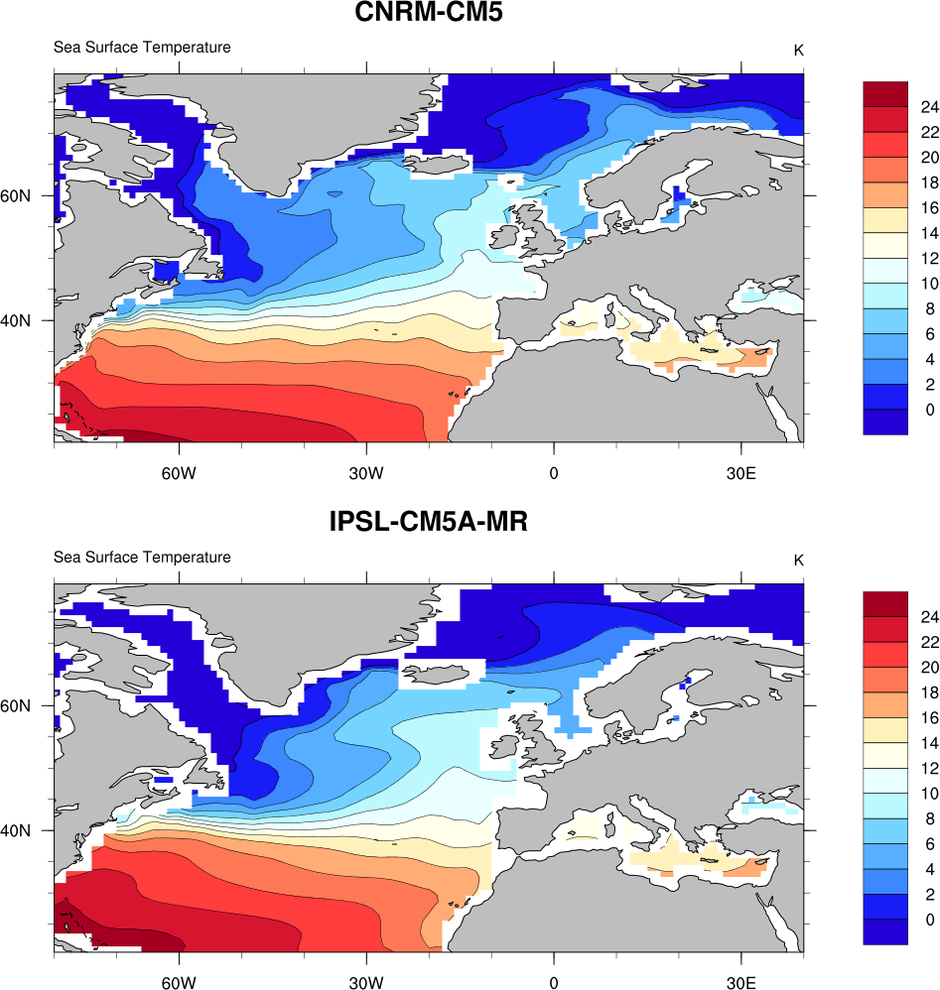

In [4]:
# -- On every member I will apply:

# --   - a DJF average
djf_ens_cmip5 = clim_average(ens_cmip5, 'DJF')

# --   - a regridding on a common grid
rgrd_djf_ens_cmip5 = regridn(djf_ens_cmip5, cdogrid='r360x180')
    
# --   - a selection of geographical domain
NAtl_rgrd_djf_ens_cmip5 = llbox(rgrd_djf_ens_cmip5, lonmin=-80, lonmax=40, latmin=20, latmax=80)

# -- And do a multiplot (warning: limited to 24 plots...)
pp = dict(focus='ocean', offset=-273.15, contours=1)
#   -> see plot() documentation: https://climaf.readthedocs.io/en/latest/scripts/plot.html
mp = cpage( plot(NAtl_rgrd_djf_ens_cmip5, **pp) )

iplot(mp)

## 3. Modify the content of an ensemble: add/retrieve members, do specific treatments on some of them...
## and set the order of the members

### We will use a CMIP5_extent example, for all available models do not cover the period (as previously shown in part 1)

In [3]:
req_cmip5_extent = ds(project='CMIP5_extent', variable='tas', experiment='historical',
                      model='*', period='1990-2010', table='Amon', version='latest')

ens_cmip5_extent = req_cmip5_extent.explore('ensemble')

### The CliMAF ensemble object behaves very similarly as a python dictionary.
### So, as for python dictionaries:
- we remove elements with .pop(elt)
- add new ones with .update(dict(new_member=...))

### Note that:
- It is possible to modify directly the ensemble object
- but it might be safer to make a copy and modify the copy


### Example with a copy: 

In [13]:
ok_ens_cmip5_extent = ens_cmip5_extent.copy()

### Here, we want to retrieve the members that do not cover the requested period
### We make a loop on the elements of the object
- each 'elt' is a key of the ensemble
- and we access its value with ens_cmip5_extent[elt]

In [14]:
for elt in ens_cmip5_extent:
    print elt
    # -- Apply the time consistency check 
    if not check_time_consistency_CMIP(ens_cmip5_extent[elt]):
        # -- And remove the elements that do not pass the test
        print 'period not covered for ',elt
        ok_ens_cmip5_extent.pop(elt)

ACCESS1-0
ACCESS1-3
CESM1-CAM5-1-FV2
period not covered for  CESM1-CAM5-1-FV2
IPSL-CM5B-LR
FIO-ESM
CMCC-CMS
SP-CCSM4
period not covered for  SP-CCSM4
MIROC-ESM
HadGEM2-ES
CanESM2
FGOALS-s2
MPI-ESM-MR
CSIRO-Mk3-6-0
CESM1-BGC
HadGEM2-AO
inmcm4
GISS-E2-R-CC
BNU-ESM
period not covered for  BNU-ESM
CCSM4
GFDL-ESM2G
CMCC-CM
period not covered for  CMCC-CM
MRI-CGCM3
GFDL-ESM2M
NorESM1-M
IPSL-CM5A-MR
IPSL-CM5A-LR
GFDL-CM3
CNRM-CM5
GISS-E2-H
MIROC-ESM-CHEM
MRI-ESM1
NorESM1-ME
MIROC5
GISS-E2-R
HadGEM2-CC
GISS-E2-H-CC
CMCC-CESM
bcc-csm1-1-m
MPI-ESM-LR
bcc-csm1-1
CESM1-CAM5


### Let's have a look at the ensemble:

In [15]:
ok_ens_cmip5_extent

cens({'ACCESS1-0':ds('CMIP5_extent%%tas%1990-2010%global%/prodigfs/project%ACCESS1-0%Amon%historical%rcp85%r1i1p1%mon%atmos%latest'),'ACCESS1-3':ds('CMIP5_extent%%tas%1990-2010%global%/prodigfs/project%ACCESS1-3%Amon%historical%rcp85%r1i1p1%mon%atmos%latest'),'IPSL-CM5B-LR':ds('CMIP5_extent%%tas%1990-2010%global%/prodigfs/project%IPSL-CM5B-LR%Amon%historical%rcp85%r1i1p1%mon%atmos%latest'),'FIO-ESM':ds('CMIP5_extent%%tas%1990-2010%global%/prodigfs/project%FIO-ESM%Amon%historical%rcp85%r1i1p1%mon%atmos%latest'),'CMCC-CMS':ds('CMIP5_extent%%tas%1990-2010%global%/prodigfs/project%CMCC-CMS%Amon%historical%rcp85%r1i1p1%mon%atmos%latest'),'MIROC-ESM':ds('CMIP5_extent%%tas%1990-2010%global%/prodigfs/project%MIROC-ESM%Amon%historical%rcp85%r1i1p1%mon%atmos%latest'),'HadGEM2-ES':ds('CMIP5_extent%%tas%1990-2010%global%/prodigfs/project%HadGEM2-ES%Amon%historical%rcp85%r1i1p1%mon%atmos%latest'),'CanESM2':ds('CMIP5_extent%%tas%1990-2010%global%/prodigfs/project%CanESM2%Amon%historical%rcp85%r1i1p1

### Trivial example of how to add a member:

In [16]:
new_member = ds(project='ref_ts', variable='tos', product='HadISST')
ok_new_member = new_member.explore('resolve')

summary(ok_new_member)

/data/jservon/Evaluation/ReferenceDatasets/ts/oce/mo/tos/tos_Omon_HadISST_observations_187001-201204.nc


{'domain': 'global',
 'frequency': 'monthly',
 'obs_type': 'observations',
 'period': 1980-2005,
 'product': 'HadISST',
 'project': 'ref_ts',
 'simulation': 'refproduct',
 'variable': 'tos'}

### Use update => the member is added to the CliMAF ensemble

In [23]:
ok_ens_cmip5_extent.update(dict(HadISST=ok_new_member))

ok_ens_cmip5_extent

cens({'ACCESS1-0':ds('CMIP5_extent%%tas%1990-2010%global%/prodigfs/project%ACCESS1-0%Amon%historical%rcp85%r1i1p1%mon%atmos%latest'),'ACCESS1-3':ds('CMIP5_extent%%tas%1990-2010%global%/prodigfs/project%ACCESS1-3%Amon%historical%rcp85%r1i1p1%mon%atmos%latest'),'IPSL-CM5B-LR':ds('CMIP5_extent%%tas%1990-2010%global%/prodigfs/project%IPSL-CM5B-LR%Amon%historical%rcp85%r1i1p1%mon%atmos%latest'),'FIO-ESM':ds('CMIP5_extent%%tas%1990-2010%global%/prodigfs/project%FIO-ESM%Amon%historical%rcp85%r1i1p1%mon%atmos%latest'),'CMCC-CMS':ds('CMIP5_extent%%tas%1990-2010%global%/prodigfs/project%CMCC-CMS%Amon%historical%rcp85%r1i1p1%mon%atmos%latest'),'MIROC-ESM':ds('CMIP5_extent%%tas%1990-2010%global%/prodigfs/project%MIROC-ESM%Amon%historical%rcp85%r1i1p1%mon%atmos%latest'),'HadGEM2-ES':ds('CMIP5_extent%%tas%1990-2010%global%/prodigfs/project%HadGEM2-ES%Amon%historical%rcp85%r1i1p1%mon%atmos%latest'),'CanESM2':ds('CMIP5_extent%%tas%1990-2010%global%/prodigfs/project%CanESM2%Amon%historical%rcp85%r1i1p1

### Modify the order of the members: CliMAF handles the members of the ensemble in a specific order set in my_ens.order
### You can directlt modify it:

In [24]:
ok_ens_cmip5_extent.order

['ACCESS1-0',
 'ACCESS1-3',
 'IPSL-CM5B-LR',
 'FIO-ESM',
 'CMCC-CMS',
 'MIROC-ESM',
 'HadGEM2-ES',
 'CanESM2',
 'FGOALS-s2',
 'MPI-ESM-MR',
 'CSIRO-Mk3-6-0',
 'CESM1-BGC',
 'HadGEM2-AO',
 'inmcm4',
 'GISS-E2-R-CC',
 'CCSM4',
 'GFDL-ESM2G',
 'MRI-CGCM3',
 'GFDL-ESM2M',
 'NorESM1-M',
 'IPSL-CM5A-MR',
 'IPSL-CM5A-LR',
 'GFDL-CM3',
 'CNRM-CM5',
 'GISS-E2-H',
 'MIROC-ESM-CHEM',
 'MRI-ESM1',
 'NorESM1-ME',
 'MIROC5',
 'GISS-E2-R',
 'HadGEM2-CC',
 'GISS-E2-H-CC',
 'CMCC-CESM',
 'bcc-csm1-1-m',
 'MPI-ESM-LR',
 'bcc-csm1-1',
 'CESM1-CAM5',
 'HadISST']

In [25]:
# -- We will put HadISST first, and sort the models in alphabetical order
tmp_members = ok_ens_cmip5_extent.order

# -- Remove HadISST from the list
tmp_members.remove('HadISST')

new_order = ['HadISST'] + sorted(tmp_members)
new_order

['HadISST',
 'ACCESS1-0',
 'ACCESS1-3',
 'CCSM4',
 'CESM1-BGC',
 'CESM1-CAM5',
 'CMCC-CESM',
 'CMCC-CMS',
 'CNRM-CM5',
 'CSIRO-Mk3-6-0',
 'CanESM2',
 'FGOALS-s2',
 'FIO-ESM',
 'GFDL-CM3',
 'GFDL-ESM2G',
 'GFDL-ESM2M',
 'GISS-E2-H',
 'GISS-E2-H-CC',
 'GISS-E2-R',
 'GISS-E2-R-CC',
 'HadGEM2-AO',
 'HadGEM2-CC',
 'HadGEM2-ES',
 'IPSL-CM5A-LR',
 'IPSL-CM5A-MR',
 'IPSL-CM5B-LR',
 'MIROC-ESM',
 'MIROC-ESM-CHEM',
 'MIROC5',
 'MPI-ESM-LR',
 'MPI-ESM-MR',
 'MRI-CGCM3',
 'MRI-ESM1',
 'NorESM1-M',
 'NorESM1-ME',
 'bcc-csm1-1',
 'bcc-csm1-1-m',
 'inmcm4']

### Use the method .set_order() to pass the new order

In [26]:
ok_ens_cmip5_extent.set_order(new_order)

### And here is my modified ensemble with the new order:

In [27]:
ok_ens_cmip5_extent.order

['HadISST',
 'ACCESS1-0',
 'ACCESS1-3',
 'CCSM4',
 'CESM1-BGC',
 'CESM1-CAM5',
 'CMCC-CESM',
 'CMCC-CMS',
 'CNRM-CM5',
 'CSIRO-Mk3-6-0',
 'CanESM2',
 'FGOALS-s2',
 'FIO-ESM',
 'GFDL-CM3',
 'GFDL-ESM2G',
 'GFDL-ESM2M',
 'GISS-E2-H',
 'GISS-E2-H-CC',
 'GISS-E2-R',
 'GISS-E2-R-CC',
 'HadGEM2-AO',
 'HadGEM2-CC',
 'HadGEM2-ES',
 'IPSL-CM5A-LR',
 'IPSL-CM5A-MR',
 'IPSL-CM5B-LR',
 'MIROC-ESM',
 'MIROC-ESM-CHEM',
 'MIROC5',
 'MPI-ESM-LR',
 'MPI-ESM-MR',
 'MRI-CGCM3',
 'MRI-ESM1',
 'NorESM1-M',
 'NorESM1-ME',
 'bcc-csm1-1',
 'bcc-csm1-1-m',
 'inmcm4']

## 4. Make an ensemble by hand: cens()
https://climaf.readthedocs.io/en/master/functions_data.html?highlight=cens#cens-define-an-ensemble-of-objects

### Get three datasets by hand: three decades of the same simulation

In [ ]:
m1 = ds(project='CMIP6', period='1980-1989', variable='tas', table='Amon')
m2 = ds(project='CMIP6', period='1990-1999', variable='tas', table='Amon')
m3 = ds(project='CMIP6', period='2000-2009', variable='tas', table='Amon')

print m1.explore('choices')
print m2.explore('choices')
print m3.explore('choices')

### And create the ensemble with cens()

In [31]:
ens_by_decades_r1i1p1f1 = cens( {'CMIP6_1980-1989': m1.explore('resolve'),
                                 'CMIP6_1990-1999': m2.explore('resolve'),
                                 'CMIP6_2000-2009': m3.explore('resolve')
                                },
                               order=['CMIP6_1980-1989', 'CMIP6_1990-1999', 'CMIP6_2000-2009']
                              )

In [32]:
ens_by_decades_r1i1p1f1

cens({'CMIP6_1980-1989':ds('CMIP6%%tas%1980-1989%global%/ccc/work/cont003/cmip6/cmip6%IPSL-CM6A-LR%IPSL%CMIP%Amon%historical%r1i1p1f1%gr%latest'),'CMIP6_1990-1999':ds('CMIP6%%tas%1990-1999%global%/ccc/work/cont003/cmip6/cmip6%IPSL-CM6A-LR%IPSL%CMIP%Amon%historical%r1i1p1f1%gr%latest'),'CMIP6_2000-2009':ds('CMIP6%%tas%2000-2009%global%/ccc/work/cont003/cmip6/cmip6%IPSL-CM6A-LR%IPSL%CMIP%Amon%historical%r1i1p1f1%gr%latest')})

In [33]:
ens_by_decades_r1i1p1f1.order

['CMIP6_1980-1989', 'CMIP6_1990-1999', 'CMIP6_2000-2009']

## 5. Merge ensembles
Merging ensembles can be very useful if you want to make the same treatment on all the members.
Let's say that you have a climatology over the historical period for an ensemble, and a climatology in a scenario, and that you want to retrieve all the pretreated files.

This example is the preparation for last point: get the path/filenames of all the pretreated members ready to be used in my favourite script without having to plug my script in CliMAF.

In [39]:
hist_req = ds(project='CMIP5', experiment='historical', period='1980-2000',
              model='*', variable='tas', frequency='monthly', version='latest')

rcp85_req = ds(project='CMIP5', experiment='rcp85', period='2040-2060',
              model='*', variable='tas', frequency='monthly', version='latest')


print 'explore("choices") for request on historicals = '
print hist_req.explore('choices')
print '--'
print '--'
print 'explore("choices") for request on rcp85 = '
print rcp85_req.explore('choices')
print '--'
print '--'

explore("choices") for request on historicals = 
{'table': 'Amon', 'model': ['ACCESS1-0', 'ACCESS1-3', 'MIROC4h', 'GFDL-ESM2M', 'FIO-ESM', 'CMCC-CMS', 'FGOALS-g2', 'HadCM3', 'MIROC-ESM', 'HadGEM2-ES', 'CanESM2', 'FGOALS-s2', 'MPI-ESM-P', 'MPI-ESM-MR', 'CSIRO-Mk3-6-0', 'CESM1-BGC', 'HadGEM2-AO', 'inmcm4', 'CESM1-FASTCHEM', 'GISS-E2-R-CC', 'CNRM-CM5-2', 'IPSL-CM5B-LR', 'GFDL-CM2p1', 'GFDL-ESM2G', 'MRI-CGCM3', 'CanCM4', 'CCSM4', 'NorESM1-M', 'CESM1-WACCM', 'IPSL-CM5A-MR', 'IPSL-CM5A-LR', 'GFDL-CM3', 'CNRM-CM5', 'GISS-E2-H', 'MIROC-ESM-CHEM', 'MRI-ESM1', 'NorESM1-ME', 'MIROC5', 'GISS-E2-R', 'HadGEM2-CC', 'GISS-E2-H-CC', 'CMCC-CESM', 'bcc-csm1-1-m', 'MPI-ESM-LR', 'bcc-csm1-1', 'CESM1-CAM5'], 'realm': 'atmos'}
--
--
explore("choices") for request on rcp85 = 
{'table': 'Amon', 'model': ['ACCESS1-0', 'ACCESS1-3', 'CESM1-CAM5-1-FV2', 'IPSL-CM5B-LR', 'FIO-ESM', 'CMCC-CMS', 'SP-CCSM4', 'MIROC-ESM', 'HadGEM2-ES', 'CanESM2', 'FGOALS-s2', 'MPI-ESM-MR', 'CSIRO-Mk3-6-0', 'CESM1-BGC', 'HadGEM2-AO', 'in

### Bonus: check that the models are available in both requests: historical run and scenario rcp85

In [42]:
available_models = []
rcp85_models = rcp85_req.explore('choices')['model']
hist_models = hist_req.explore('choices')['model']
for model in hist_models:
    if model in rcp85_models:
        available_models.append(model)
available_models

['ACCESS1-0',
 'ACCESS1-3',
 'GFDL-ESM2M',
 'FIO-ESM',
 'CMCC-CMS',
 'MIROC-ESM',
 'HadGEM2-ES',
 'CanESM2',
 'FGOALS-s2',
 'MPI-ESM-MR',
 'CSIRO-Mk3-6-0',
 'CESM1-BGC',
 'HadGEM2-AO',
 'inmcm4',
 'GISS-E2-R-CC',
 'IPSL-CM5B-LR',
 'GFDL-ESM2G',
 'MRI-CGCM3',
 'CCSM4',
 'NorESM1-M',
 'IPSL-CM5A-MR',
 'IPSL-CM5A-LR',
 'GFDL-CM3',
 'CNRM-CM5',
 'GISS-E2-H',
 'MIROC-ESM-CHEM',
 'MRI-ESM1',
 'NorESM1-ME',
 'MIROC5',
 'GISS-E2-R',
 'HadGEM2-CC',
 'GISS-E2-H-CC',
 'CMCC-CESM',
 'bcc-csm1-1-m',
 'MPI-ESM-LR',
 'bcc-csm1-1',
 'CESM1-CAM5']

### And with this new list, build the coherent ensembles with eds():

In [45]:
hist_ensemble = eds(project='CMIP5', experiment='historical', period='1980-2000',
              model=available_models, variable='tas', frequency='monthly', version='latest')

rcp85_ensemble = eds(project='CMIP5', experiment='rcp85', period='2040-2060',
              model=available_models, variable='tas', frequency='monthly', version='latest')

In [46]:
summary(hist_ensemble)

Keys - values:
{'domain': 'global', 'realm': '*', 'version': 'latest', 'period': 1980-2000, 'simulation': '', 'project': 'CMIP5', 'experiment': 'historical', 'frequency': 'monthly', 'realization': 'r1i1p1', 'variable': 'tas', 'table': '*', 'model': 'ACCESS1-0', 'root': '/prodigfs/project'}
-- Ensemble members:
ACCESS1-0
/prodigfs/project/CMIP5/output/CSIRO-BOM/ACCESS1-0/historical/mon/atmos/Amon/r1i1p1/latest/tas/tas_Amon_ACCESS1-0_historical_r1i1p1_185001-200512.nc
--
ACCESS1-3
/prodigfs/project/CMIP5/output/CSIRO-BOM/ACCESS1-3/historical/mon/atmos/Amon/r1i1p1/latest/tas/tas_Amon_ACCESS1-3_historical_r1i1p1_185001-200512.nc
--
GFDL-ESM2M
/prodigfs/project/CMIP5/output/NOAA-GFDL/GFDL-ESM2M/historical/mon/atmos/Amon/r1i1p1/latest/tas/tas_Amon_GFDL-ESM2M_historical_r1i1p1_197601-198012.nc
/prodigfs/project/CMIP5/output/NOAA-GFDL/GFDL-ESM2M/historical/mon/atmos/Amon/r1i1p1/latest/tas/tas_Amon_GFDL-ESM2M_historical_r1i1p1_198101-198512.nc
/prodigfs/project/CMIP5/output/NOAA-GFDL/GFDL-ESM2M

In [47]:
summary(rcp85_ensemble)

Keys - values:
{'domain': 'global', 'realm': '*', 'version': 'latest', 'period': 2040-2060, 'simulation': '', 'project': 'CMIP5', 'experiment': 'rcp85', 'frequency': 'monthly', 'realization': 'r1i1p1', 'variable': 'tas', 'table': '*', 'model': 'ACCESS1-0', 'root': '/prodigfs/project'}
-- Ensemble members:
ACCESS1-0
/prodigfs/project/CMIP5/output/CSIRO-BOM/ACCESS1-0/rcp85/mon/atmos/Amon/r1i1p1/latest/tas/tas_Amon_ACCESS1-0_rcp85_r1i1p1_200601-210012.nc
--
ACCESS1-3
/prodigfs/project/CMIP5/output/CSIRO-BOM/ACCESS1-3/rcp85/mon/atmos/Amon/r1i1p1/latest/tas/tas_Amon_ACCESS1-3_rcp85_r1i1p1_200601-210012.nc
--
GFDL-ESM2M
/prodigfs/project/CMIP5/output/NOAA-GFDL/GFDL-ESM2M/rcp85/mon/atmos/Amon/r1i1p1/latest/tas/tas_Amon_GFDL-ESM2M_rcp85_r1i1p1_203601-204012.nc
/prodigfs/project/CMIP5/output/NOAA-GFDL/GFDL-ESM2M/rcp85/mon/atmos/Amon/r1i1p1/latest/tas/tas_Amon_GFDL-ESM2M_rcp85_r1i1p1_204101-204512.nc
/prodigfs/project/CMIP5/output/NOAA-GFDL/GFDL-ESM2M/rcp85/mon/atmos/Amon/r1i1p1/latest/tas/tas_A

/prodigfs/project/CMIP5/output/BCC/bcc-csm1-1-m/rcp85/mon/atmos/Amon/r1i1p1/latest/tas/tas_Amon_bcc-csm1-1-m_rcp85_r1i1p1_200601-209912.nc
--
MPI-ESM-LR
/prodigfs/project/CMIP5/output/MPI-M/MPI-ESM-LR/rcp85/mon/atmos/Amon/r1i1p1/latest/tas/tas_Amon_MPI-ESM-LR_rcp85_r1i1p1_200601-210012.nc
--
bcc-csm1-1
/prodigfs/project/CMIP5/output/BCC/bcc-csm1-1/rcp85/mon/atmos/Amon/r1i1p1/latest/tas/tas_Amon_bcc-csm1-1_rcp85_r1i1p1_200601-209912.nc
--
CESM1-CAM5
/prodigfs/project/CMIP5/output/NSF-DOE-NCAR/CESM1-CAM5/rcp85/mon/atmos/Amon/r1i1p1/latest/tas/tas_Amon_CESM1-CAM5_rcp85_r1i1p1_200601-210012.nc
--


### hist_ensemble and rcp85_ensemble have the same member names!
### -> Before merging, we need to rename the members:

In [52]:
renamed_hist_ensemble = add_prefix_suffix_to_ens_req(hist_ensemble, suffix='_hist')
renamed_rcp85_ensemble = add_prefix_suffix_to_ens_req(rcp85_ensemble, suffix='_rcp85')

In [53]:
summary(renamed_hist_ensemble)

Keys - values:
{'domain': 'global', 'realm': '*', 'version': 'latest', 'period': 1980-2000, 'simulation': '', 'project': 'CMIP5', 'experiment': 'historical', 'frequency': 'monthly', 'realization': 'r1i1p1', 'variable': 'tas', 'table': '*', 'model': 'ACCESS1-0', 'root': '/prodigfs/project'}
-- Ensemble members:
ACCESS1-0_hist
/prodigfs/project/CMIP5/output/CSIRO-BOM/ACCESS1-0/historical/mon/atmos/Amon/r1i1p1/latest/tas/tas_Amon_ACCESS1-0_historical_r1i1p1_185001-200512.nc
--
ACCESS1-3_hist
/prodigfs/project/CMIP5/output/CSIRO-BOM/ACCESS1-3/historical/mon/atmos/Amon/r1i1p1/latest/tas/tas_Amon_ACCESS1-3_historical_r1i1p1_185001-200512.nc
--
GFDL-ESM2M_hist
/prodigfs/project/CMIP5/output/NOAA-GFDL/GFDL-ESM2M/historical/mon/atmos/Amon/r1i1p1/latest/tas/tas_Amon_GFDL-ESM2M_historical_r1i1p1_197601-198012.nc
/prodigfs/project/CMIP5/output/NOAA-GFDL/GFDL-ESM2M/historical/mon/atmos/Amon/r1i1p1/latest/tas/tas_Amon_GFDL-ESM2M_historical_r1i1p1_198101-198512.nc
/prodigfs/project/CMIP5/output/NOAA-

In [54]:
summary(renamed_rcp85_ensemble)

Keys - values:
{'domain': 'global', 'realm': '*', 'version': 'latest', 'period': 2040-2060, 'simulation': '', 'project': 'CMIP5', 'experiment': 'rcp85', 'frequency': 'monthly', 'realization': 'r1i1p1', 'variable': 'tas', 'table': '*', 'model': 'NorESM1-M', 'root': '/prodigfs/project'}
-- Ensemble members:
ACCESS1-0_rcp85
/prodigfs/project/CMIP5/output/CSIRO-BOM/ACCESS1-0/rcp85/mon/atmos/Amon/r1i1p1/latest/tas/tas_Amon_ACCESS1-0_rcp85_r1i1p1_200601-210012.nc
--
ACCESS1-3_rcp85
/prodigfs/project/CMIP5/output/CSIRO-BOM/ACCESS1-3/rcp85/mon/atmos/Amon/r1i1p1/latest/tas/tas_Amon_ACCESS1-3_rcp85_r1i1p1_200601-210012.nc
--
GFDL-ESM2M_rcp85
/prodigfs/project/CMIP5/output/NOAA-GFDL/GFDL-ESM2M/rcp85/mon/atmos/Amon/r1i1p1/latest/tas/tas_Amon_GFDL-ESM2M_rcp85_r1i1p1_203601-204012.nc
/prodigfs/project/CMIP5/output/NOAA-GFDL/GFDL-ESM2M/rcp85/mon/atmos/Amon/r1i1p1/latest/tas/tas_Amon_GFDL-ESM2M_rcp85_r1i1p1_204101-204512.nc
/prodigfs/project/CMIP5/output/NOAA-GFDL/GFDL-ESM2M/rcp85/mon/atmos/Amon/r1i1p

### Eventually, we use merge_climaf_ensembles to make one ensemble with those two:
### -> keeps the order of the members and the order of the list of ensembles

In [55]:
total_ensemble = merge_climaf_ensembles([renamed_hist_ensemble, renamed_rcp85_ensemble])
summary(total_ensemble)

Keys - values:
{'domain': 'global', 'realm': '*', 'version': 'latest', 'period': 2040-2060, 'simulation': '', 'project': 'CMIP5', 'experiment': 'rcp85', 'frequency': 'monthly', 'realization': 'r1i1p1', 'variable': 'tas', 'table': '*', 'model': 'MPI-ESM-MR', 'root': '/prodigfs/project'}
-- Ensemble members:
ACCESS1-0_hist
/prodigfs/project/CMIP5/output/CSIRO-BOM/ACCESS1-0/historical/mon/atmos/Amon/r1i1p1/latest/tas/tas_Amon_ACCESS1-0_historical_r1i1p1_185001-200512.nc
--
ACCESS1-3_hist
/prodigfs/project/CMIP5/output/CSIRO-BOM/ACCESS1-3/historical/mon/atmos/Amon/r1i1p1/latest/tas/tas_Amon_ACCESS1-3_historical_r1i1p1_185001-200512.nc
--
GFDL-ESM2M_hist
/prodigfs/project/CMIP5/output/NOAA-GFDL/GFDL-ESM2M/historical/mon/atmos/Amon/r1i1p1/latest/tas/tas_Amon_GFDL-ESM2M_historical_r1i1p1_197601-198012.nc
/prodigfs/project/CMIP5/output/NOAA-GFDL/GFDL-ESM2M/historical/mon/atmos/Amon/r1i1p1/latest/tas/tas_Amon_GFDL-ESM2M_historical_r1i1p1_198101-198512.nc
/prodigfs/project/CMIP5/output/NOAA-GFDL

## 6. Get the path/filenames of all my pretreated files with tagnames

### "OK the pretreatment is convincing but I feel limited in your CliMAF stuff... I prefer to use my own scripts"
### No problem!
### You can just get the list of your pretreated files in a txt or json file:

In [56]:
# -- And save a json file (or txt) with the list of pretreated netcdf files tagged with their names in the ensemble
# -- This way you don't have to stay in CliMAF and can use your tools directly on the pretreated files
save_req_file(total_ensemble, filename='my_list_of_files.txt')

ACCESS1-0_hist /data/jservon/climafcache/dc1c0/9f087/81e2b/0a0a8/56d15/66042/b2c36/1eece/23459/674c2/71c50/a.nc
ACCESS1-3_hist /data/jservon/climafcache/1e0b7/b41ca/f97f9/d25be/0ba9e/3dcf8/26f30/c1164/f16b9/02a1c/3e36b/3.nc
GFDL-ESM2M_hist /data/jservon/climafcache/b5572/64caf/c5c41/7be6e/3448f/512c2/81b9c/2f938/a439d/7a5a9/ccdcc/e.nc
FIO-ESM_hist /data/jservon/climafcache/9e61b/b3465/2f781/a9f91/04296/f18d7/0a9a6/78eb6/494a2/1ad1e/3fca3/6.nc
CMCC-CMS_hist /data/jservon/climafcache/5401b/86920/f1370/c1b48/0e8f2/e292e/4ade4/51c05/72f39/b3758/56659/7.nc
MIROC-ESM_hist /data/jservon/climafcache/900df/f4395/61ae8/33c58/3ef21/a65d3/621c4/23ebd/a271a/63a24/95ae5/b.nc
HadGEM2-ES_hist /data/jservon/climafcache/18997/cea28/cb223/81435/64ef1/e18a1/83ed4/01106/1a500/d7525/411b4/3.nc
CanESM2_hist /data/jservon/climafcache/3ea8f/afc2a/0da6d/d3589/0095e/67d6c/3bb19/f76a2/71e2f/757b2/81432/1.nc
FGOALS-s2_hist /data/jservon/climafcache/76181/8bdc6/4f771/7105f/5153b/140ef/d6de2/1fe3d/350bf/174e6/97143/

CESM1-CAM5_rcp85 /data/jservon/climafcache/1f572/c215d/22d22/5b8d6/7ef9b/e074d/52ef5/d8c51/484fc/d73d7/e336e/2.nc


In [57]:
!cat my_list_of_files.txt

ACCESS1-0_hist /data/jservon/climafcache/dc1c0/9f087/81e2b/0a0a8/56d15/66042/b2c36/1eece/23459/674c2/71c50/a.nc 
ACCESS1-3_hist /data/jservon/climafcache/1e0b7/b41ca/f97f9/d25be/0ba9e/3dcf8/26f30/c1164/f16b9/02a1c/3e36b/3.nc 
GFDL-ESM2M_hist /data/jservon/climafcache/b5572/64caf/c5c41/7be6e/3448f/512c2/81b9c/2f938/a439d/7a5a9/ccdcc/e.nc 
FIO-ESM_hist /data/jservon/climafcache/9e61b/b3465/2f781/a9f91/04296/f18d7/0a9a6/78eb6/494a2/1ad1e/3fca3/6.nc 
CMCC-CMS_hist /data/jservon/climafcache/5401b/86920/f1370/c1b48/0e8f2/e292e/4ade4/51c05/72f39/b3758/56659/7.nc 
MIROC-ESM_hist /data/jservon/climafcache/900df/f4395/61ae8/33c58/3ef21/a65d3/621c4/23ebd/a271a/63a24/95ae5/b.nc 
HadGEM2-ES_hist /data/jservon/climafcache/18997/cea28/cb223/81435/64ef1/e18a1/83ed4/01106/1a500/d7525/411b4/3.nc 
CanESM2_hist /data/jservon/climafcache/3ea8f/afc2a/0da6d/d3589/0095e/67d6c/3bb19/f76a2/71e2f/757b2/81432/1.nc 
FGOALS-s2_hist /data/jservon/climafcache/76181/8bdc6/4f771/7105f/5153b/140ef/d6de2/1fe3d/350bf/174e

In [58]:
save_req_file(total_ensemble, filename='my_list_of_files.json')

ACCESS1-0_hist /data/jservon/climafcache/dc1c0/9f087/81e2b/0a0a8/56d15/66042/b2c36/1eece/23459/674c2/71c50/a.nc
ACCESS1-3_hist /data/jservon/climafcache/1e0b7/b41ca/f97f9/d25be/0ba9e/3dcf8/26f30/c1164/f16b9/02a1c/3e36b/3.nc
GFDL-ESM2M_hist /data/jservon/climafcache/b5572/64caf/c5c41/7be6e/3448f/512c2/81b9c/2f938/a439d/7a5a9/ccdcc/e.nc
FIO-ESM_hist /data/jservon/climafcache/9e61b/b3465/2f781/a9f91/04296/f18d7/0a9a6/78eb6/494a2/1ad1e/3fca3/6.nc
CMCC-CMS_hist /data/jservon/climafcache/5401b/86920/f1370/c1b48/0e8f2/e292e/4ade4/51c05/72f39/b3758/56659/7.nc
MIROC-ESM_hist /data/jservon/climafcache/900df/f4395/61ae8/33c58/3ef21/a65d3/621c4/23ebd/a271a/63a24/95ae5/b.nc
HadGEM2-ES_hist /data/jservon/climafcache/18997/cea28/cb223/81435/64ef1/e18a1/83ed4/01106/1a500/d7525/411b4/3.nc
CanESM2_hist /data/jservon/climafcache/3ea8f/afc2a/0da6d/d3589/0095e/67d6c/3bb19/f76a2/71e2f/757b2/81432/1.nc
FGOALS-s2_hist /data/jservon/climafcache/76181/8bdc6/4f771/7105f/5153b/140ef/d6de2/1fe3d/350bf/174e6/97143/

In [59]:
!cat my_list_of_files.json

{
    "NorESM1-M_rcp85": "/data/jservon/climafcache/f0fb0/53c8f/e73f3/bc637/e918e/5b94e/b4d0e/67a58/5fe44/41f48/afc6b/9.nc", 
    "ACCESS1-0_hist": "/data/jservon/climafcache/dc1c0/9f087/81e2b/0a0a8/56d15/66042/b2c36/1eece/23459/674c2/71c50/a.nc", 
    "MPI-ESM-LR_hist": "/data/jservon/climafcache/28160/d5d1d/19afa/1d804/a5547/a1733/69389/585e2/abb05/3b040/edb2c/b.nc", 
    "IPSL-CM5B-LR_hist": "/data/jservon/climafcache/c08b6/8749e/62cf6/7c5b0/f227e/c280a/b7d92/15ebf/be8be/0205a/e142d/1.nc", 
    "NorESM1-ME_hist": "/data/jservon/climafcache/79e03/e8a60/8b1aa/9d4b3/d82fa/b7cd5/67515/9af93/12b95/7db7c/55d65/0.nc", 
    "CMCC-CMS_hist": "/data/jservon/climafcache/5401b/86920/f1370/c1b48/0e8f2/e292e/4ade4/51c05/72f39/b3758/56659/7.nc", 
    "inmcm4_hist": "/data/jservon/climafcache/22371/f0d81/32a72/fb897/57d83/300cd/489a8/f352a/5a508/5a64b/8df53/7.nc", 
    "CSIRO-Mk3-6-0_rcp85": "/data/jservon/climafcache/9f798/c2faa/89b69/e865f/659c0/457f1/d465a/8d7cd/1c36a/a4f3d/e2575/e.nc", 
    "Ca

### And of course, you can apply all the pretreatments you want to the members of your ensemble before getting your list of files.
For the available operators, we invite you to go deeper in CliMAF documentation and other CliMAF notebooks.


#   
## This was how to work with CliMAF ensembles!
##  
##  